# NYC COVID-19 cases

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf)

## 0. Import dependencies

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

## 1. Read data

In [3]:
update_str = 'as of March 29, 2020, 4:15 pm'
source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

data_file = '../data/nyc-health-daily-updates/cases/nyc-covid-19-summary-from-2020-03-23.csv'

df = pd.read_csv(data_file)
df

,date,time,total_cases,age_median,age_min,age_max,age_0_to_17,age_18_to_44,age_45_to_64,age_65_to_74,...,sex_female,sex_male,sex_unknown,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,borough_unknown,deaths
0,2020-03-23,09:35,12339,45,0,105,323,5704,4069,1308,...,5255,7067,17,1829,3494,2572,3621,817,6,99
1,2020-03-23,17:00,13119,45,0,105,341,6035,4343,1402,...,5612,7490,17,1999,3742,2646,3848,877,7,125
2,2020-03-24,09:45,14776,45,0,105,374,6786,4906,1591,...,6374,8379,23,2328,4237,2887,4364,953,7,131
3,2020-03-24,17:00,15597,46,0,105,384,7094,5194,1689,...,6736,8838,23,2505,4407,3013,4667,999,6,192
4,2020-03-25,17:30,20011,46,0,105,446,8880,6786,2226,...,8655,11325,31,3542,5232,3616,6420,1166,35,280
5,2020-03-26,17:00,23112,47,0,105,495,10145,7869,2627,...,10124,12948,40,4243,6095,4046,7362,1330,36,365
6,2020-03-27,16:00,26697,47,0,105,543,11617,9158,3034,...,11792,14863,42,4880,7091,4627,8529,1534,36,450
7,2020-03-28,16:00,30765,48,0,105,591,13213,10596,3571,...,13592,17133,40,5752,8129,5237,9831,1781,35,672


In [3]:
# Show latest data
df.iloc[-1]

date                     2020-03-28
time                          16:00
total_cases                   30765
age_median                       48
age_min                           0
age_max                         105
age_0_to_17                     591
age_18_to_44                  13213
age_45_to_64                  10596
age_65_to_74                   3571
age_75_and_over                2724
age_unknown                      70
age_50_and_over               14279
age_under_50                  16416
sex_female                    13592
sex_male                      17133
sex_unknown                      40
borough_bronx                  5752
borough_brooklyn               8129
borough_manhattan              5237
borough_queens                 9831
borough_staten_island          1781
borough_unknown                  35
deaths                          672
Name: 7, dtype: object

## 2. Define helper functions

In [4]:
# Helper function to format y-labels as thousands (e.g., 1000 as 1k)
def thousands(x, pos):
    k = int(x / 1000)
    if k == 0:
        return '0'
    else:
        return str(k) + 'k'

## 3. Plot Cases by Age Group

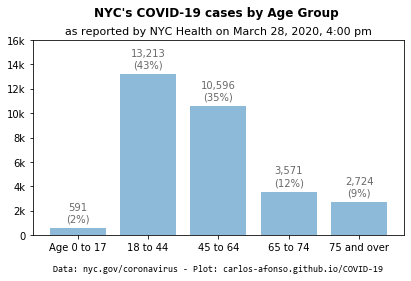

In [5]:
fig = plt.figure()

cols   = ['age_0_to_17', 'age_18_to_44', 'age_45_to_64', 'age_65_to_74', 'age_75_and_over']
labels = ['Age 0 to 17',     '18 to 44',     '45 to 64',     '65 to 74',     '75 and over']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 16000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('NYC\'s COVID-19 cases by Age Group', x=0.51, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.35, -3000, source_str, fontfamily='Consolas', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 4. Plot Cases by Sex

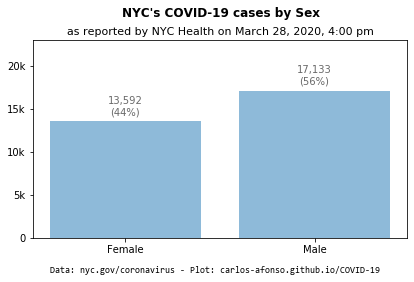

In [7]:
fig = plt.figure()

cols = ['sex_female', 'sex_male']
labels = ['Female', 'Male']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 23000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('NYC\'s COVID-19 cases by Sex', x=0.52, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.4, -4100, source_str, fontfamily='Consolas', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [8]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-sex'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 5. Plot Cases by Borough

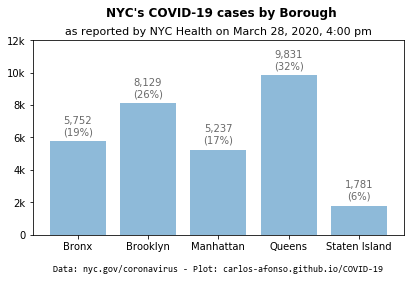

In [9]:
fig = plt.figure()

boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island']
cols = ['borough_' + b for b in boroughs]
labels = [b.replace('_', ' ').title() for b in boroughs]
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 12000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('NYC\'s COVID-19 cases by Borough', x=0.52, fontweight='bold')

plt.title(update_str, fontsize=11)

plt.text(-0.35, -2300, source_str, fontfamily='Consolas', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [10]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-borough'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)